In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
data=pd.read_csv(r"C:\Users\susha\Downloads\car_age_price.csv")

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [5]:
data.shape

(112, 2)

In [6]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [7]:
data.duplicated().sum()

54

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(58, 2)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    58 non-null     int64
 1   Price   58 non-null     int64
dtypes: int64(2)
memory usage: 1.4 KB


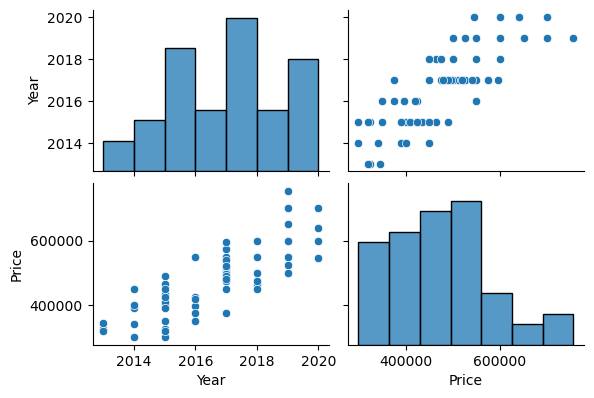

In [11]:
sns.pairplot(data, height = 2, aspect = 1.5)

C:\Users\susha\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


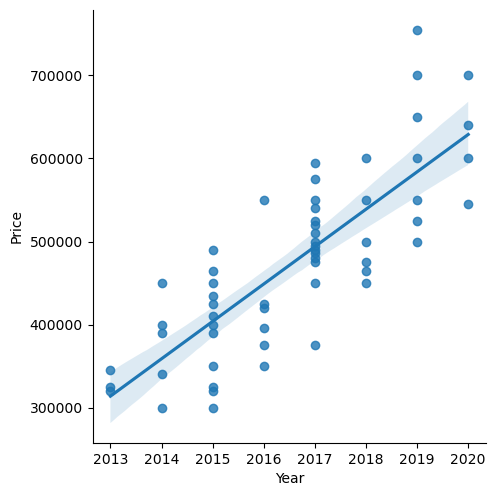

In [12]:
sns.pairplot(data, x_vars=['Year'], y_vars='Price', size=5, aspect=1, kind='reg')

In [13]:
data.corr()

,Year,Price
Year,1.000000,0.807276
Price,0.807276,1.000000


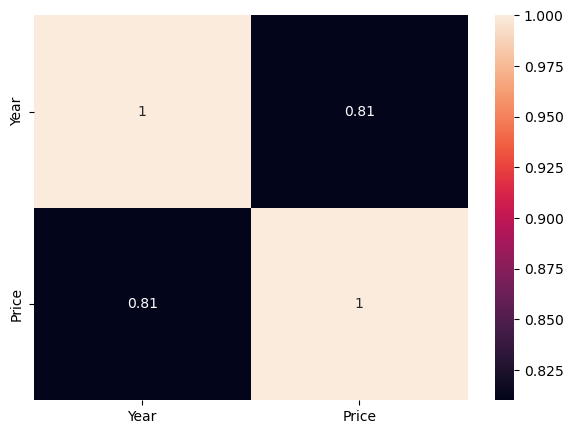

In [14]:
plt.figure(figsize=(7,5))
sns.heatmap(round(data.corr(),2),annot=True)
plt.show()

In [16]:
X = data['Year']    
Y = data['Price']                

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.05, random_state=5000)

In [18]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (55, 1)
y_train shape:  (55, 1)

Test cases as below
X_test shape:  (3, 1)
y_test shape:  (3, 1)


In [19]:
X_train.head()

,Year
6,2016
45,2018
108,2014
22,2015
50,2013


In [20]:
y_train.head()

,Price
6,425000
45,450000
108,300000
22,434999
50,325000


In [21]:
X_test.head()

,Year
68,2015
97,2020
65,2017


In [22]:
y_test.head()

,Price
68,465000
97,640000
65,495000


In [44]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(fit_intercept=True)
lr= LinearRegression()

In [45]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [46]:
print('Intercept:',lr_model.intercept_)
print('Coefficients:',lr_model.coef_) 

Intercept: [-90811457.2194613]
Coefficients: [[45267.27446889]]


In [47]:
X_train.columns

Index(['Year'], dtype='object')

In [48]:
(lr_model.coef_).T

array([[45267.27446889]])

In [49]:
pd.DataFrame((lr_model.coef_).T,index=X_train.columns,\
             columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)

,Co-efficients
Year,45267.274469


In [50]:
y_pred_train = lr_model.predict(X_train)  

In [51]:
y_pred_train 

array([[447368.10982549],
       [537902.65876327],
       [356833.56088771],
       [402100.83535659],
       [311566.28641881],
       [492635.38429439],
       [402100.83535659],
       [447368.10982549],
       [492635.38429439],
       [583169.93323217],
       [492635.38429439],
       [583169.93323217],
       [311566.28641881],
       [492635.38429439],
       [447368.10982549],
       [402100.83535659],
       [492635.38429439],
       [447368.10982549],
       [492635.38429439],
       [356833.56088771],
       [402100.83535659],
       [447368.10982549],
       [628437.20770106],
       [402100.83535659],
       [537902.65876327],
       [492635.38429439],
       [537902.65876327],
       [402100.83535659],
       [583169.93323217],
       [583169.93323217],
       [537902.65876327],
       [492635.38429439],
       [628437.20770106],
       [447368.10982549],
       [356833.56088771],
       [492635.38429439],
       [492635.38429439],
       [402100.83535659],
       [3568

In [52]:
y_pred_test= lr_model.predict(X_test) 

In [53]:
y_pred_test

array([[402100.83535659],
       [628437.20770106],
       [492635.38429439]])

In [56]:
model = lr.fit(X_train,y_train)

In [67]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score


In [68]:
lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.2)

In [70]:
linear_reg_predictions = lr.predict(X_test)
linear_reg_mse = mean_squared_error(y_test,linear_reg_predictions)

lasso_reg_predictions = lasso_reg.predict(X_test)
lasso_reg_mse = mean_squared_error(y_test,lasso_reg_predictions)

In [73]:
print(mean_squared_error(y_test,y_pred_test))
print(r2_score(y_test,y_pred_test))

1365198162.0073698
0.7661887067922677


In [71]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [58]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 51597.08505311039
MAE for test set is 25608.857549319666


In [59]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [60]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 3983235193.636138
MSE for test set is 1365198162.0073698


In [39]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [40]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 56693.4963322767
RMSE for test set is 66205.34305571442


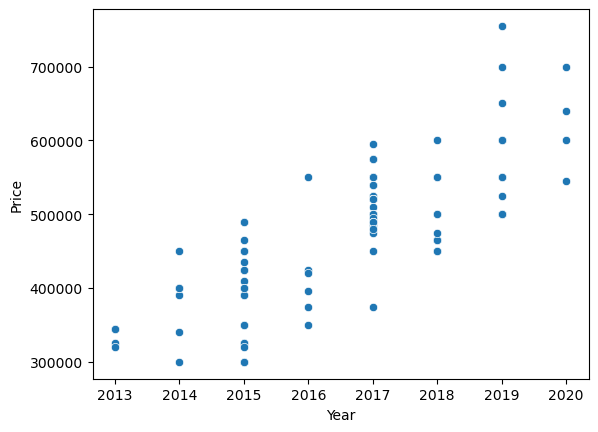

In [41]:
a = sns.scatterplot(x="Year", y="Price", data=data)

In [74]:
a=model.predict([[2022]])

C:\Users\susha\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [75]:
a

array([[718971.75663884]])